# Using `ResourcesEstimation` to count Bucket Brigade costs

### 1. Start by importing the necessary packages, and check the versions loaded are what you want.

In [1]:
import numpy as np
import qsharp

Preparing Q# environment...


In [ ]:
qsharp.component_versions()

### 2. Set the parameters you want for your estimations.

In [ ]:
# Memory parameters
n_address_bits = 5 
n_value_bits = 2


### 3. Get the estimates for complete programs.

**NB:** If you change the `ResourcesEstimate.qs` file, you will need to reload the qsharp definitions:

In [4]:
qsharp.reload()

You can see what you currently have compiled from the `ResourcesEstimation.qs` file:

In [ ]:
qsharp.get_available_operations_by_namespace()["ResourcesEstimation"]

Use the `from ... import ...` syntax to import the operations you want to run.

In [5]:
from ResourcesEstimation import SetupBaseQRAM
from ResourcesEstimation import QueryBaseQRAM

In [6]:
base_resources = SetupBaseQRAM.estimate_resources(addressSize=3, dataSize=1)
total_query_resources = QueryBaseQRAM.estimate_resources(addressSize=3, dataSize=1, queryAddress=2)

In [7]:
query_resources = {key: total_query_resources[key] - base_resources.get(key, 0) 
                       for key in total_query_resources.keys()}
query_resources

{'CNOT': 216,
 'QubitClifford': 43,
 'R': 0,
 'Measure': 4,
 'T': 140,
 'Depth': 71,
 'Width': 12,
 'BorrowedWidth': 0}

In [17]:
# n = number of address bits
# k = number of data bits
# To match what is in the primer
def bb_resources_by_hand(n, k):
    resources = {
        "CNOT" : (16 + 7*k)*(2**n) - 28,
        "QubitClifford" : (4 + 2*k)*(2**n) - 8,
        "R" : 0,
        "Measure" : 0,
        "T" : (14 + 7*k)*(2**n) - 28,
        "Depth" : (6 + 3*k)*(2**n) - 12,
        "Width" : (k+1)*(2**n) + n + k,
        "FullDepth" : (18 + 9*k)*(2**n) + 2*n - 34
    }
    return resources

In [30]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

In [34]:
min_address_size = 3
max_address_size = 15

min_data_bits = 1
max_data_bits = 4

n=3, k=1
Base resources
{'CNOT': 0, 'QubitClifford': 1, 'R': 0, 'Measure': 9, 'T': 0, 'Depth': 0, 'Width': 8, 'BorrowedWidth': 0}
Q#:
{'CNOT': 216, 'QubitClifford': 42, 'R': 0, 'Measure': 4, 'T': 140, 'Depth': 71, 'Width': 20, 'BorrowedWidth': 0}
By hand
{'CNOT': 156, 'QubitClifford': 40, 'R': 0, 'Measure': 0, 'T': 140, 'Depth': 60, 'Width': 20, 'FullDepth': 188}



n=4, k=1
Base resources
{'CNOT': 0, 'QubitClifford': 1, 'R': 0, 'Measure': 17, 'T': 0, 'Depth': 0, 'Width': 16, 'BorrowedWidth': 0}
Q#:
{'CNOT': 472, 'QubitClifford': 90, 'R': 0, 'Measure': 5, 'T': 308, 'Depth': 137, 'Width': 37, 'BorrowedWidth': 0}
By hand
{'CNOT': 340, 'QubitClifford': 88, 'R': 0, 'Measure': 0, 'T': 308, 'Depth': 132, 'Width': 37, 'FullDepth': 406}



n=5, k=1
Base resources
{'CNOT': 0, 'QubitClifford': 1, 'R': 0, 'Measure': 33, 'T': 0, 'Depth': 0, 'Width': 32, 'BorrowedWidth': 0}
Q#:
{'CNOT': 984, 'QubitClifford': 186, 'R': 0, 'Measure': 6, 'T': 644, 'Depth': 259, 'Width': 70, 'BorrowedWidth': 0}
By hand

n=13, k=2
Base resources
{'CNOT': 0, 'QubitClifford': 2, 'R': 0, 'Measure': 16386, 'T': 0, 'Depth': 0, 'Width': 16384, 'BorrowedWidth': 0}
Q#:
{'CNOT': 344024, 'QubitClifford': 65530, 'R': 0, 'Measure': 15, 'T': 229348, 'Depth': 57464, 'Width': 24591, 'BorrowedWidth': 0}
By hand
{'CNOT': 245732, 'QubitClifford': 65528, 'R': 0, 'Measure': 0, 'T': 229348, 'Depth': 98292, 'Width': 24591, 'FullDepth': 294904}



n=14, k=2
Base resources
{'CNOT': 0, 'QubitClifford': 2, 'R': 0, 'Measure': 32770, 'T': 0, 'Depth': 0, 'Width': 32768, 'BorrowedWidth': 0}
Q#:
{'CNOT': 688088, 'QubitClifford': 131066, 'R': 0, 'Measure': 16, 'T': 458724, 'Depth': 114818, 'Width': 49168, 'BorrowedWidth': 0}
By hand
{'CNOT': 491492, 'QubitClifford': 131064, 'R': 0, 'Measure': 0, 'T': 458724, 'Depth': 196596, 'Width': 49168, 'FullDepth': 589818}



n=3, k=3
Base resources
{'CNOT': 0, 'QubitClifford': 3, 'R': 0, 'Measure': 27, 'T': 0, 'Depth': 0, 'Width': 24, 'BorrowedWidth': 0}
Q#:
{'CNOT': 376, 'QubitClifford': 74, '

n=10, k=4
Base resources
{'CNOT': 0, 'QubitClifford': 4, 'R': 0, 'Measure': 4100, 'T': 0, 'Depth': 0, 'Width': 4096, 'BorrowedWidth': 0}
Q#:
{'CNOT': 63448, 'QubitClifford': 12282, 'R': 0, 'Measure': 14, 'T': 42980, 'Depth': 7268, 'Width': 5134, 'BorrowedWidth': 0}
By hand
{'CNOT': 45028, 'QubitClifford': 12280, 'R': 0, 'Measure': 0, 'T': 42980, 'Depth': 18420, 'Width': 5134, 'FullDepth': 55282}



n=11, k=4
Base resources
{'CNOT': 0, 'QubitClifford': 4, 'R': 0, 'Measure': 8196, 'T': 0, 'Depth': 0, 'Width': 8192, 'BorrowedWidth': 0}
Q#:
{'CNOT': 126936, 'QubitClifford': 24570, 'R': 0, 'Measure': 15, 'T': 85988, 'Depth': 14446, 'Width': 10255, 'BorrowedWidth': 0}
By hand
{'CNOT': 90084, 'QubitClifford': 24568, 'R': 0, 'Measure': 0, 'T': 85988, 'Depth': 36852, 'Width': 10255, 'FullDepth': 110580}



n=12, k=4
Base resources
{'CNOT': 0, 'QubitClifford': 4, 'R': 0, 'Measure': 16388, 'T': 0, 'Depth': 0, 'Width': 16384, 'BorrowedWidth': 0}
Q#:
{'CNOT': 253912, 'QubitClifford': 49146, 'R': 0,

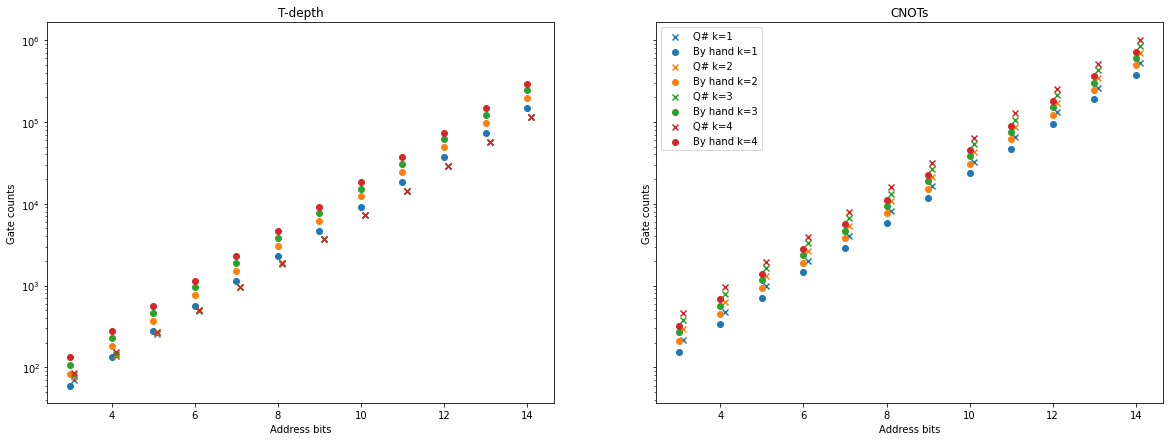

In [41]:
# Creates just a figure and only one subplot
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for k in range(min_data_bits, max_data_bits + 1):
    t_depth_qsharp = []
    t_depth_by_hand = []
    cnot_qsharp = []
    cnot_by_hand = []
    
    for n in range(min_address_size, max_address_size):
        base_resources = SetupBaseQRAM.estimate_resources(addressSize=n, dataSize=k)
        total_query_resources = QueryBaseQRAM.estimate_resources(addressSize=n, dataSize=k, queryAddress=0)
        query_resources = {key: total_query_resources[key] - base_resources.get(key, 0) 
                           for key in total_query_resources.keys()}
        
        # Width has to be that of the query otherwise the aux qubits don't get added 
        query_resources['Width'] = total_query_resources['Width']
        
        by_hand_resources = bb_resources_by_hand(n, k)
        
        print(f"n={n}, k={k}")
        print("Base resources")
        print(base_resources)
        print("Q#:")
        print(query_resources)
        print("By hand")
        print(by_hand_resources)
        print("\n\n")

        t_depth_qsharp.append(query_resources['Depth'])
        t_depth_by_hand.append(by_hand_resources['Depth'])
        cnot_qsharp.append(query_resources['CNOT'])
        cnot_by_hand.append(by_hand_resources['CNOT'])

    # Creates two subplots and unpacks the output array immediately
    ax1.scatter([x + 0.1 for x in list(range(min_address_size, max_address_size))], t_depth_qsharp, marker="x", label=f"Q# k={k}", color=colours[k-1]) 
    ax1.scatter(list(range(min_address_size, max_address_size)), t_depth_by_hand, marker="o", label=f"By hand k={k}", color=colours[k-1]) 
    ax1.set_title('T-depth')
    ax1.set_yscale('log')
    
    # Creates two subplots and unpacks the output array immediately
    ax2.scatter([x + 0.1 for x in list(range(min_address_size, max_address_size))], cnot_qsharp, marker="x", label=f"Q# k={k}", color=colours[k-1]) 
    ax2.scatter(list(range(min_address_size, max_address_size)), cnot_by_hand, marker="o", label=f"By hand k={k}", color=colours[k-1]) 
    ax2.set_title('CNOTs')
    ax2.set_yscale('log')
    
ax1.set_xlabel("Address bits")
ax2.set_xlabel("Address bits")
ax1.set_ylabel("Gate counts")
ax2.set_ylabel("Gate counts")
plt.legend()
plt.savefig("first_comparison.pdf")

In [ ]:
plt.plot(list(range(min_address_size, max_address_size)), t_depth, label=f"n={n}, data={n_value_bits}")

In [ ]:
base_resources = SetupBaseQRAM.toffoli_simulate(addressSize=n)
total_query_resources = QueryBaseQRAM.toffoli_simulate(addressSize=n, queryAddress=0)